# predicted water demand vs actual water consumption for 2023 using machine learning model random forest

# importing the libraries

In [1]:
# standard libraries
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn           as sns # enhanced data viz

In [2]:
from sklearn.model_selection import train_test_split #train test 
from sklearn.ensemble import RandomForestRegressor #rf model
from sklearn.metrics import r2_score, mean_absolute_error # metric of evulation of model
from sklearn.preprocessing import StandardScaler # to scale the data for better performance

In [3]:
# supress warnings (be careful while using this)
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
#read the dataset
df=pd.read_excel('water_data_uj1.xlsx')

In [5]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [6]:
#Get the fisrt five row
df.head()

,Year,Month,total_population,percent_res_students,res_students,Major_recess_holiday,type,Duration_days,percent_estimated_people_on_campus,estimated_people_on_campus,Avg_Max_Temp,Avg_Min_Temp,Rainfall,Consumption
0,2019,January,63133.617784,0.102544,6474,yes,Summer holiday,31,0.45,28410.128003,26,16,130,70094
1,2019,February,63133.617784,0.102544,6474,no,Academic class,20,0.90,56820.256006,25,15,105,78093
2,2019,March,63133.617784,0.102544,6474,yes,Mid semester vacation,9,0.60,37880.170670,23,13,90,91188
3,2019,April,63133.617784,0.102544,6474,no,Academic class,20,0.90,56820.256006,21,10,60,75430
4,2019,May,63133.617784,0.102544,6474,no,Academic class,20,0.90,56820.256006,18,6,20,68003


In [7]:
#Get the last five row of data
df.tail()

,Year,Month,total_population,percent_res_students,res_students,Major_recess_holiday,type,Duration_days,percent_estimated_people_on_campus,estimated_people_on_campus,Avg_Max_Temp,Avg_Min_Temp,Rainfall,Consumption
55,2023,August,66672.073371,0.110016,7335,no,Academic class,20,0.9,60004.866034,17,5,10,59660
56,2023,September,66672.073371,0.110016,7335,yes,Mid semester vacation,9,0.6,40003.244023,20,8,26,54527
57,2023,October,66672.073371,0.110016,7335,no,Academic class,20,0.9,60004.866034,24,12,79,46782
58,2023,November,66672.073371,0.110016,7335,yes,Study/exam period,20,0.7,46670.451360,25,14,130,36835
59,2023,December,66672.073371,0.110016,7335,yes,Summer holiday,31,0.2,13334.414674,26,16,135,49767


In [8]:
#Get the name of columns
df.columns

Index(['Year', 'Month', 'total_population ', 'percent_res_students', 'res_students', 'Major_recess_holiday', 'type', 'Duration_days', 'percent_estimated_people_on_campus', 'estimated_people_on_campus', 'Avg_Max_Temp ', 'Avg_Min_Temp ', 'Rainfall', 'Consumption'], dtype='object')

In [9]:
#Get the info of dtype
df.dtypes

Year                                    int64
Month                                  object
total_population                      float64
percent_res_students                  float64
res_students                            int64
Major_recess_holiday                   object
type                                   object
Duration_days                           int64
percent_estimated_people_on_campus    float64
estimated_people_on_campus            float64
Avg_Max_Temp                            int64
Avg_Min_Temp                            int64
Rainfall                                int64
Consumption                             int64
dtype: object

In [10]:
#Get the shape of data
df.shape

(60, 14)

row=60,column =14

In [11]:
# check class index and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                60 non-null     int64  
 1   Month                               60 non-null     object 
 2   total_population                    60 non-null     float64
 3   percent_res_students                60 non-null     float64
 4   res_students                        60 non-null     int64  
 5   Major_recess_holiday                59 non-null     object 
 6   type                                60 non-null     object 
 7   Duration_days                       60 non-null     int64  
 8   percent_estimated_people_on_campus  60 non-null     float64
 9   estimated_people_on_campus          60 non-null     float64
 10  Avg_Max_Temp                        60 non-null     int64  
 11  Avg_Min_Temp                        60 non-null

In [12]:
#Describe the statistical analysis
df.describe()

,Year,total_population,percent_res_students,res_students,Duration_days,percent_estimated_people_on_campus,estimated_people_on_campus,Avg_Max_Temp,Avg_Min_Temp,Rainfall,Consumption
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2021.000000,63589.659905,0.089753,5744.500000,23.950000,0.609833,38937.706082,21.316667,9.983333,65.633333,59607.000000
std,1.426148,1922.954484,0.025555,1717.002359,7.019163,0.247677,16143.703847,4.123071,4.721001,48.395954,18874.787797
min,2019.000000,60780.000000,0.015301,930.000000,9.000000,0.090000,5470.200000,14.000000,2.000000,5.000000,20310.000000
25%,2020.000000,63133.617784,0.090575,5720.000000,20.000000,0.437500,27180.457337,18.000000,5.750000,16.500000,41998.250000
50%,2021.000000,63151.969580,0.099765,6406.000000,22.500000,0.600000,37891.181748,22.500000,10.500000,70.000000,61580.500000
75%,2022.000000,64210.638788,0.102544,6474.000000,31.000000,0.900000,56820.256006,25.000000,14.000000,112.750000,73950.250000
max,2023.000000,66672.073371,0.110016,7335.000000,31.000000,0.900000,60004.866034,27.000000,16.000000,140.000000,101147.000000


# Handle missing values

In [13]:
# checking each feature for missing values
df.isnull().sum()

Year                                  0
Month                                 0
total_population                      0
percent_res_students                  0
res_students                          0
Major_recess_holiday                  1
type                                  0
Duration_days                         0
percent_estimated_people_on_campus    0
estimated_people_on_campus            0
Avg_Max_Temp                          0
Avg_Min_Temp                          0
Rainfall                              0
Consumption                           0
dtype: int64

In [14]:
# Fill missing values by carrying forward the previous value
df['Major_recess_holiday'].fillna(method='ffill', inplace=True)

In [15]:
df.isnull().sum()

Year                                  0
Month                                 0
total_population                      0
percent_res_students                  0
res_students                          0
Major_recess_holiday                  0
type                                  0
Duration_days                         0
percent_estimated_people_on_campus    0
estimated_people_on_campus            0
Avg_Max_Temp                          0
Avg_Min_Temp                          0
Rainfall                              0
Consumption                           0
dtype: int64

There is no missing/nan values in dataset

# visualizations Plot before modeling 

This approach will give you a comprehensive EDA and insights into the factors that affect consumption levels in your dataset

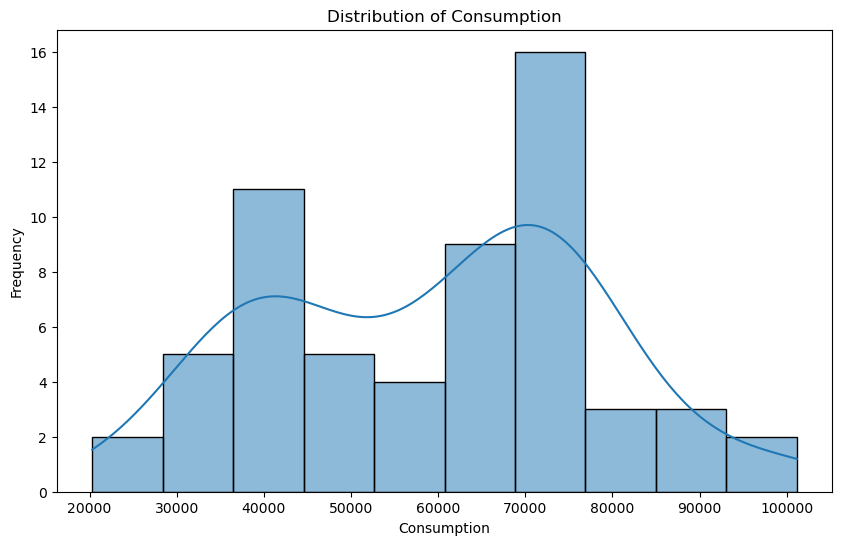

In [17]:
# Histogram for Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Consumption'], bins=10, kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

Histograms visualize the distribution of the Consumption column

<Figure size 1200x600 with 0 Axes>

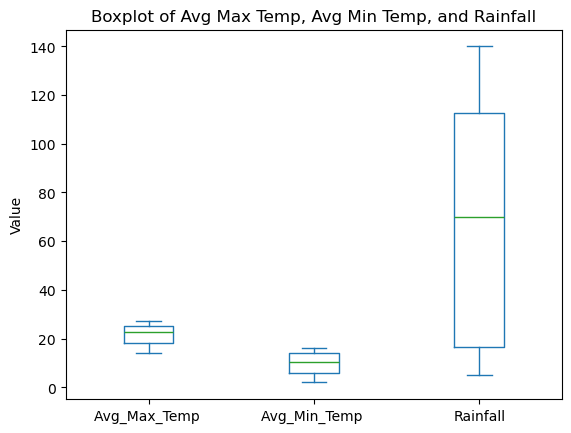

In [18]:
#Box plot for Temperature and Rainfall
plt.figure(figsize=(12, 6))
df[['Avg_Max_Temp ', 'Avg_Min_Temp ', 'Rainfall']].plot(kind='box')
plt.title('Boxplot of Avg Max Temp, Avg Min Temp, and Rainfall')
plt.ylabel('Value')
plt.show()

Box plots visualize the spread and outliers in temperature and rainfall data and the boxplot shows no outliers in the data

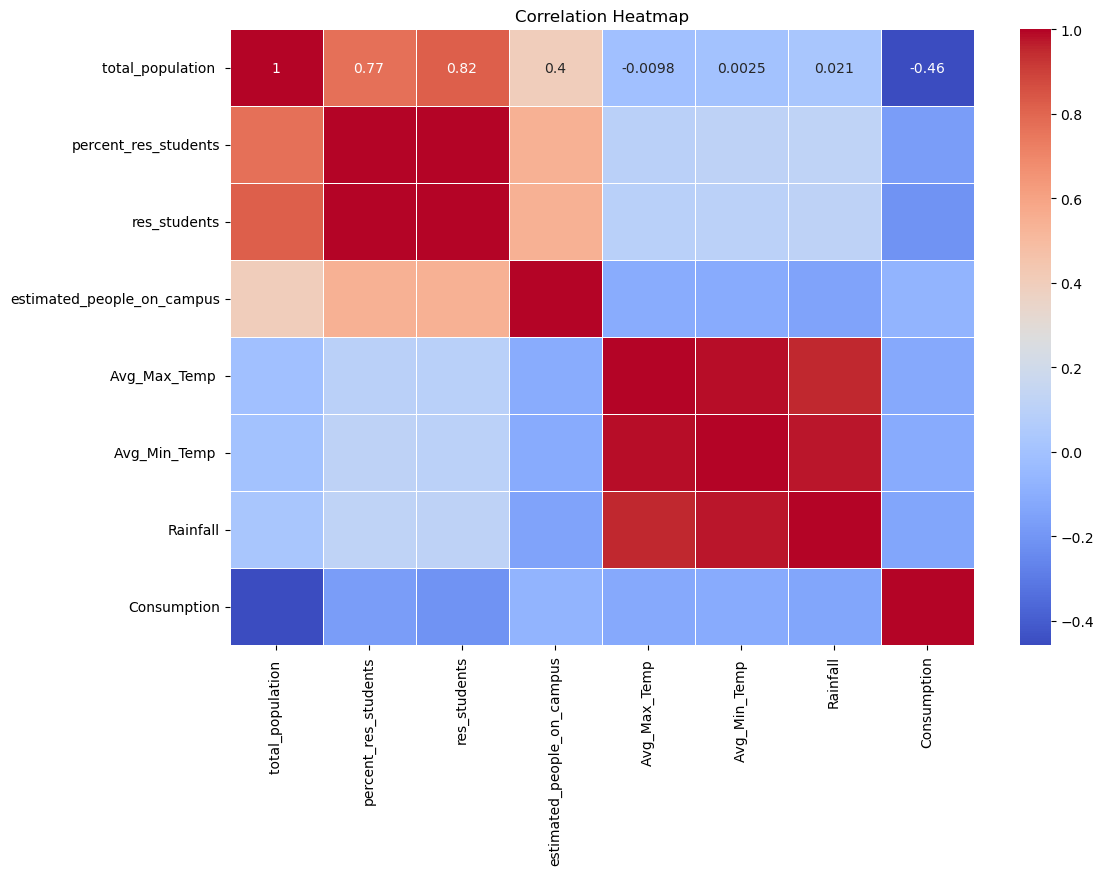

In [19]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[['total_population ', 'percent_res_students', 'res_students', 'estimated_people_on_campus',
           'Avg_Max_Temp ', 'Avg_Min_Temp ', 'Rainfall', 'Consumption']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows the correlations between variables to identify strong relationships.

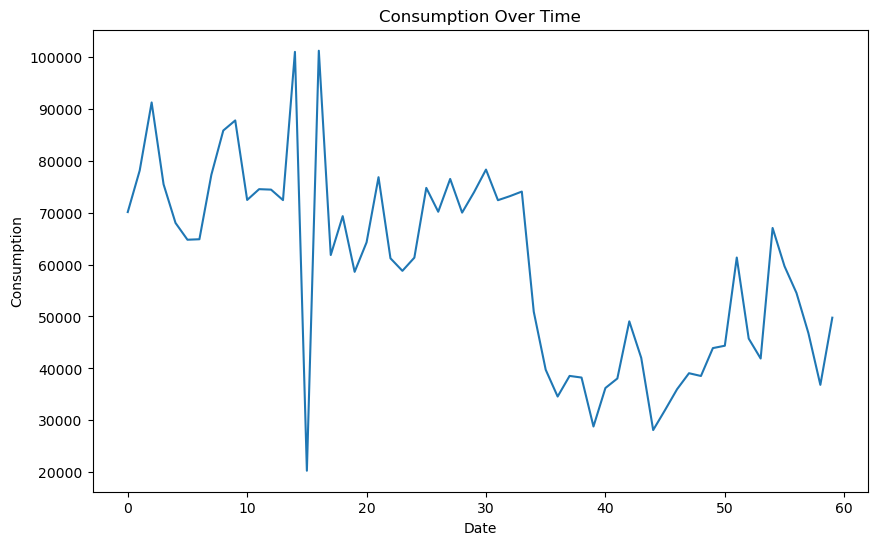

In [20]:
# 4. Line plot for Consumption over time
plt.figure(figsize=(10, 6))
df['Consumption'].plot(kind='line')
plt.title('Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

A line plot for Consumption helps visualize changes over time.


# Prepare data for modeling

In [21]:
# Mapping 'yes' to 1 and 'no' to 0
df['Major_recess_holiday'] = df['Major_recess_holiday'].map({'yes': 1, 'no': 0})

# so we remove the two object type column name 'type' and month

In [22]:
# Dropping the columns 'Year' and 'Month' and year
df1 = df.drop(['type','Month'], axis=1)


In [23]:
#Again check the type of data you can see all data type are int,float
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                60 non-null     int64  
 1   total_population                    60 non-null     float64
 2   percent_res_students                60 non-null     float64
 3   res_students                        60 non-null     int64  
 4   Major_recess_holiday                60 non-null     int64  
 5   Duration_days                       60 non-null     int64  
 6   percent_estimated_people_on_campus  60 non-null     float64
 7   estimated_people_on_campus          60 non-null     float64
 8   Avg_Max_Temp                        60 non-null     int64  
 9   Avg_Min_Temp                        60 non-null     int64  
 10  Rainfall                            60 non-null     int64  
 11  Consumption                         60 non-null

# use feature engineering to seperate the feature

In [24]:
# Separate features and target variable
X = df1.drop('Consumption', axis=1) # this is our all input data
y = df1['Consumption'] # this is our target dependent 

In [25]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Split the scaled data 70% train and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (48, 11)
X_test: (12, 11)
y_train: (48,)
y_test: (12,)


# Random forest model

In [44]:
# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=1000, max_depth=5,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=42)

In [45]:
# Make predictions
y_pred = model.predict(X_test)

In [46]:
print('prediction consumption:\n',y_pred)

prediction consumption:
 [69510.01296309 72147.78639294 39475.83383672 38235.34871875
 69398.62838403 47162.82023456 74385.16281246 46254.42019134
 64529.38438411 45612.38454931 38411.21699415 43726.62368026]


In [47]:
# Make predictions on train data
y_pred_train = model.predict(X_train)

In [48]:
print('train prediction:\n',y_pred_train)

train prediction:
 [72524.47382427 76698.2015713  48068.43749628 66716.99986001
 81520.02906413 71972.98523236 38791.39023892 72960.53627466
 40705.96886052 65915.18684924 61782.5074176  42279.86382099
 73506.3663575  53046.97120213 42694.34138944 73821.24391448
 79810.07352828 71508.62581303 74487.3497965  82456.61344329
 57637.2446778  53253.346869   67390.71037586 73282.85247121
 46778.06810695 39756.78368733 38594.42702113 72336.52035814
 32284.61396905 77645.57717997 74146.96081834 85531.60525852
 38434.9510255  34440.53173294 49683.04740559 58521.49654982
 44314.12440804 71565.03890625 61986.0113284  66951.20071225
 46514.77876435 72118.31478196 72924.18871515 45641.17645599
 87161.53557797 72392.92676391 54240.15635927 38419.82441875]


# Evaluate the model or model performance

In [49]:
# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)

In [50]:
print('train_accuracy/score:\n',r2_train)

train_accuracy/score:
 0.8849236755986778


In [51]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)

In [56]:
print(f'R² score: {r2:.2f}')

R² score: 0.79


In [57]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: 10.33%


MAPE between 10% and 20%: Good 

# Plot actual vs. predicted values

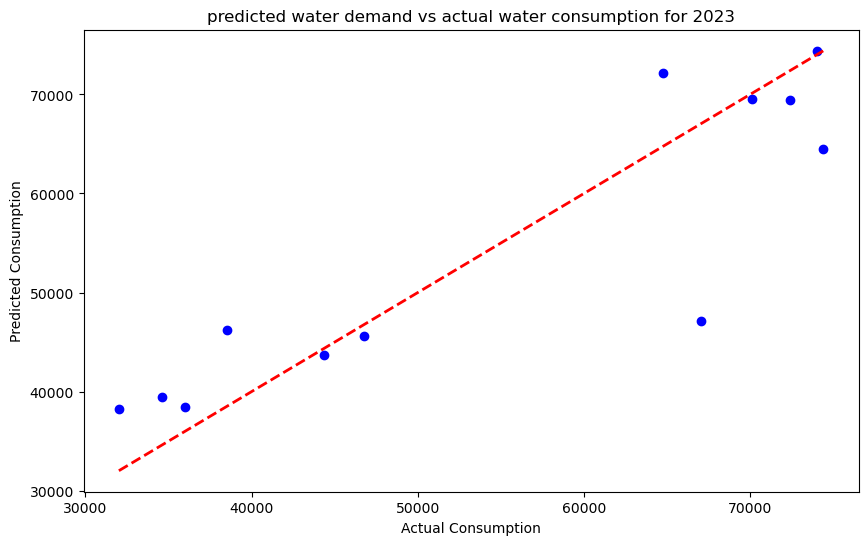

In [58]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('predicted water demand vs actual water consumption for 2023')
plt.show()

# Plot actual vs. predicted values on training data

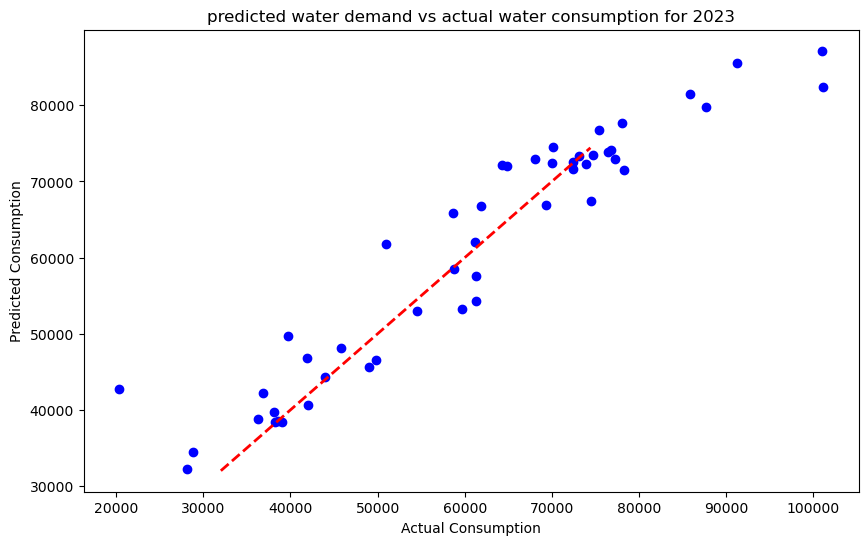

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('predicted water demand vs actual water consumption for 2023')
plt.show()

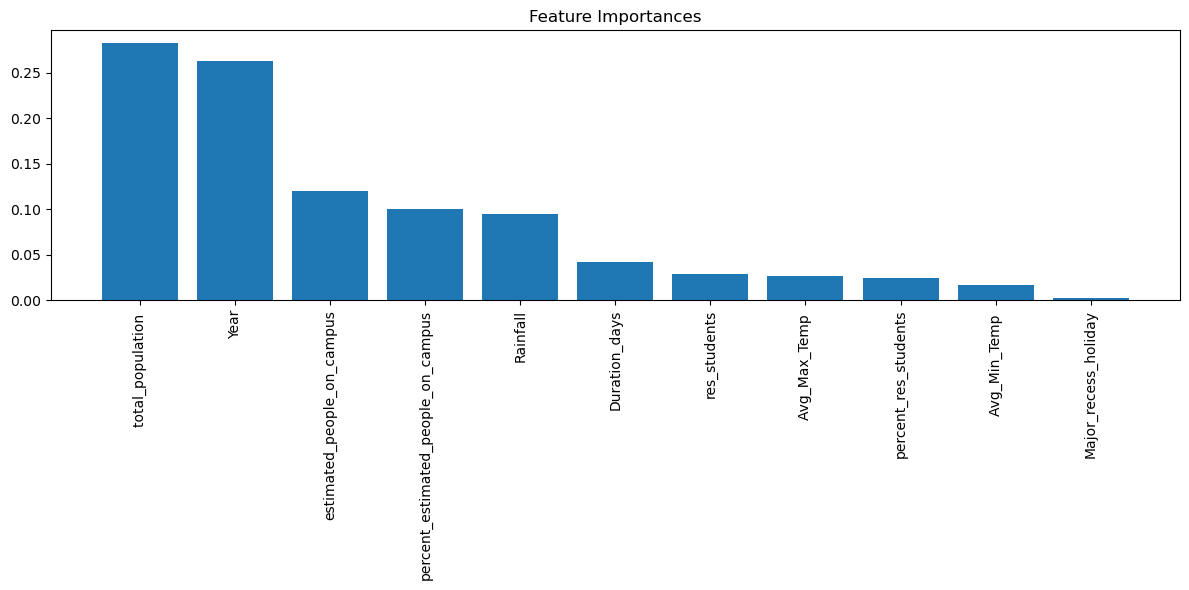

In [60]:
# Feature importance visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [61]:
# Filter the DataFrame to only include rows where the year is 2023
df_2023 = df[df['Year'] == 2023]

In [62]:
# Extract the months and actual consumption for 2023
months_2023 = df_2023['Month']
actual_consumption_2023 = df_2023['Consumption']
y_pred_2023 = y_pred[:len(df_2023)]

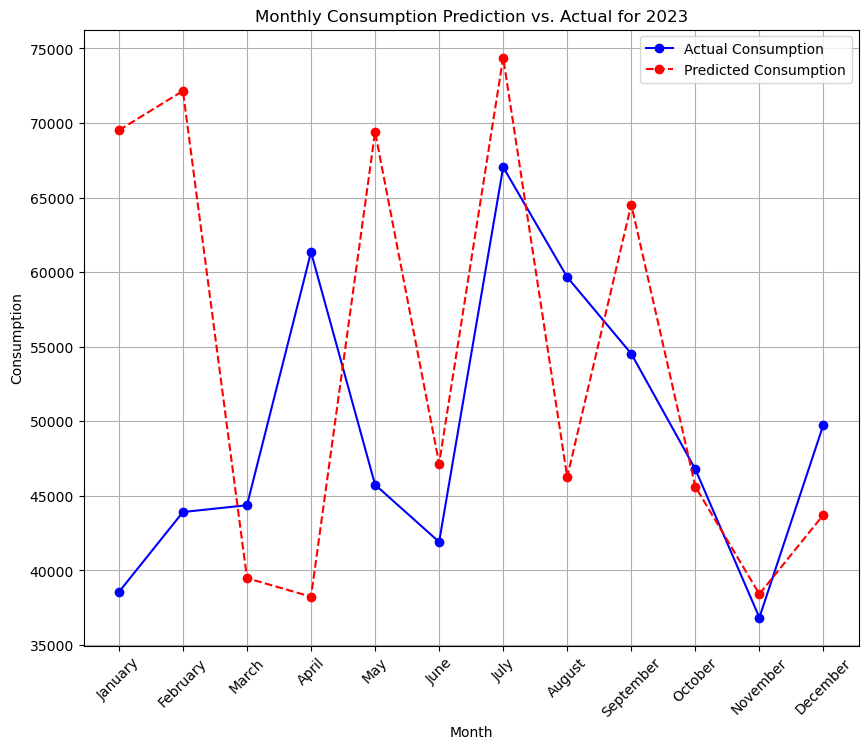

In [63]:
plt.figure(figsize=(10, 8))

# Plot actual values
plt.plot(months_2023, actual_consumption_2023, label='Actual Consumption', marker='o', linestyle='-', color='blue')

# Plot predicted values
plt.plot(months_2023, y_pred_2023, label='Predicted Consumption', marker='o', linestyle='--', color='red')

# Labeling and formatting the plot
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.title('Monthly Consumption Prediction vs. Actual for 2023')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Thank you!!**